In [1]:
import pymongo
from pymongo import MongoClient

In [2]:
client = MongoClient('localhost', 27017)

In [3]:
db = client.smartshark_test

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib notebook

In [5]:
plt.style.use('seaborn-darkgrid')

In [6]:
CollectionFrame = pd.DataFrame()

In [7]:
for name in db.collection_names():
    CollectionFrame[name] = {db[name].count():name}

In [8]:
CollectionFrame

,vcs_system,issue_system,code_entity_state,code_group_state,event,file,issue,project,commit,issue_comment,tag,hunk,file_action,plugin_schema,people,mailing_list,message,clone_instance
1,1,1,16094002,96033,27034,3528,2720,1,2371,27143,71,51795,16445,6,4585,4,67337,1469717


# Look at the files

In [25]:
files = pd.DataFrame(list(db.file.find()))

In [26]:
files.head()

,_id,path,vcs_system_id
0,5853eb373ee1b95d618826f2,CHANGES.txt,5853eb4aa737aab0c0c42518
1,5853eb373ee1b95d628826f5,NOTICE.txt,5853eb4aa737aab0c0c42518
2,5853eb373ee1b95d768826f2,.gitignore,5853eb4aa737aab0c0c42518
3,5853eb433ee1b95d848828c6,.gitattributes,5853eb4aa737aab0c0c42518
4,5853eb433ee1b95d848828cc,Cli.vcxproj,5853eb4aa737aab0c0c42518


Files seem to contain only ids and paths... That might be useful somwhere down the road...

# Looking at events

In [9]:
events = pd.DataFrame(list(db.event.find()))

In [10]:
events.head()

,_id,author_id,created_at,external_id,issue_id,new_value,old_value,status
0,585403ce78e57ebf974e7265,5853eb403ee1b95d79882840,2008-06-06 22:03:50.211,12605805%%0,585403ce78e57ebf974e725e,zk-dump.bz2,NaN,Attachment
1,585403ce78e57ebf974e7261,5853eb403ee1b95d79882840,2008-08-11 18:34:50.774,12622848%%0,585403ce78e57ebf974e725e,[3.0.0],[],fix_versions
2,585403ce78e57ebf974e7262,5853eb403ee1b95d79882840,2008-06-12 17:54:36.843,12607146%%0,585403ce78e57ebf974e725e,Resolved,Open,status
3,585403ce78e57ebf974e7263,5853eb403ee1b95d79882840,2008-06-12 17:54:36.843,12607146%%1,585403ce78e57ebf974e725e,Fixed,NaN,resolution
4,585403ce78e57ebf974e7264,5853eb403ee1b95d79882840,2008-06-11 23:27:58.675,12606990%%0,585403ce78e57ebf974e725e,Initial ZooKeeper code contribution from Yahoo!,Dump of ZooKeeper SVN repository,title


In [11]:
events.status.unique()

array([u'Attachment', u'fix_versions', u'status', u'resolution', u'title',
       u'Hadoop Flags', u'assignee_id', u'desc', u'components',
       u'issue_links', u'affects_versions', u'labels', u'Tags', u'Comment',
       u'Release Note', u'priority', u'original_time_estimate',
       u'timeestimate', u'RemoteIssueLink', u'issue_type', u'environment',
       u'parent_issue_id', u'duedate', u'timespent', u'WorklogId',
       u'Reproduced In', u'Flags', u'INFRA-Members', u'Workflow', u'Key',
       u'Project'], dtype=object)

In [87]:
events.status

0              Attachment
1            fix_versions
2                  status
3              resolution
4                   title
5                  status
6            Hadoop Flags
7              Attachment
8              Attachment
9                  status
10             Attachment
11                 status
12             Attachment
13            assignee_id
14            assignee_id
15                 status
16             Attachment
17             Attachment
18            assignee_id
19            assignee_id
20             Attachment
21            assignee_id
22                   desc
23            assignee_id
24             components
25           fix_versions
26           fix_versions
27            assignee_id
28            assignee_id
29            assignee_id
               ...       
27004         issue_links
27005          Attachment
27006     RemoteIssueLink
27007     RemoteIssueLink
27008     RemoteIssueLink
27009     RemoteIssueLink
27010     RemoteIssueLink
27011       

# Events and Issues

In [10]:
issues = pd.DataFrame(list(db.issue.find()))

In [11]:
issues.head()

,_id,affects_versions,assignee_id,components,created_at,creator_id,desc,environment,external_id,fix_versions,...,issue_system_id,issue_type,labels,original_time_estimate,parent_issue_id,priority,reporter_id,status,title,updated_at
0,585403d478e57ebf974e7292,[],NaN,[quorum],2008-06-09 16:39:34.900,5853eb373ee1b95d898826f0,syncLimit as documented in QuorumPeer is docum...,NaN,ZOOKEEPER-3,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Trivial,5853eb373ee1b95d898826f0,Open,syncLimit has slightly different comments in ...,2010-04-09 13:43:11.531
1,585403d678e57ebf974e72a1,NaN,NaN,[leaderElection],2008-06-09 16:42:38.071,5853eb373ee1b95d898826f0,FastLeaderElection.java line 224: The part of...,NaN,ZOOKEEPER-4,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Major,5853eb373ee1b95d898826f0,Open,Unnecessary condition check in FastLeaderElection,2008-10-14 20:31:43.232
2,585403d778e57ebf974e72a9,[],585403f6926fbea6a4f943b3,NaN,2008-06-09 23:43:48.032,585403f6926fbea6a4f943b3,We need an upgrade feature in zookeeper where ...,NaN,ZOOKEEPER-5,NaN,...,585403c978e57ebf974e725d,New Feature,[],NaN,NaN,Major,585403f6926fbea6a4f943b3,Open,Upgrade Feature in Zookeeper server.,2011-03-30 19:28:06.679
3,585403da78e57ebf974e72cc,[],NaN,[c client],2008-06-10 20:42:02.577,5853eb403ee1b95d79882840,Submitted on behalf of Jacob. Is is possible f...,NaN,ZOOKEEPER-6,NaN,...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Major,5853eb403ee1b95d79882840,Open,List of problem identifiers in zookeeper.h,2008-10-26 01:10:37.405
4,585403dd78e57ebf974e72dc,[],NaN,[java client],2008-06-10 21:01:06.652,5853eb403ee1b95d79882840,Moved from SourceForge to Apache.\nhttp://sour...,NaN,ZOOKEEPER-7,[3.0.0],...,585403c978e57ebf974e725d,Bug,[],NaN,NaN,Minor,5853eb403ee1b95d79882840,Open,Use enums rather than ints for types and state,2008-10-26 01:10:37.457


In [12]:
issues.columns

Index([u'_id', u'affects_versions', u'assignee_id', u'components',
       u'created_at', u'creator_id', u'desc', u'environment', u'external_id',
       u'fix_versions', u'issue_links', u'issue_system_id', u'issue_type',
       u'labels', u'original_time_estimate', u'parent_issue_id', u'priority',
       u'reporter_id', u'status', u'title', u'updated_at'],
      dtype='object')

converting \_id to Int ID

In [13]:
issues._id = issues._id.astype('string')

In [14]:
events.issue_id = events.issue_id.astype('string')

In [18]:
event_counts = events.groupby(by='issue_id')['created_at'].count().sort_values(ascending=False)

<IPython.core.display.Javascript object>


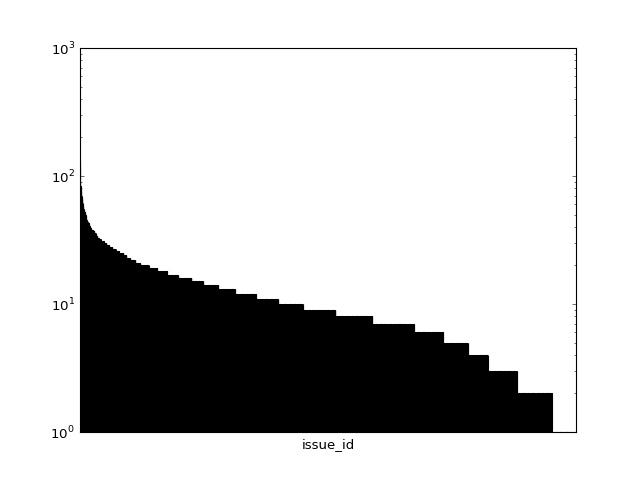

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
event_counts.plot(kind='bar', ax = ax)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yscale('log')

# Taking a closer look at issues

<IPython.core.display.Javascript object>


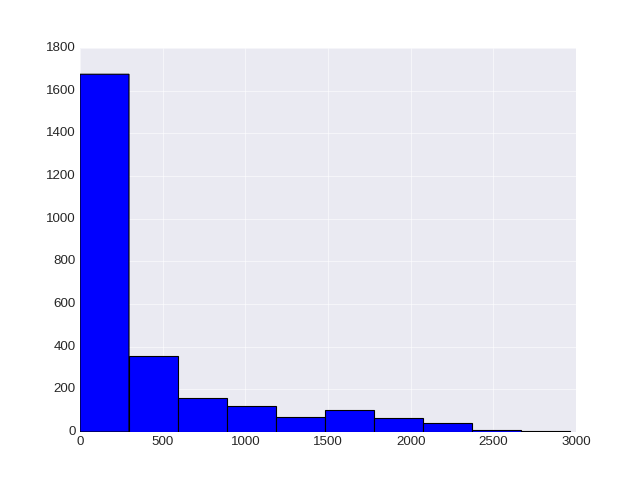

In [19]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False).dt.days.hist()

In [15]:
cmap = {'Trivial':'green', 'Minor':'yellow', 'Major':'orange', 'Critical':'red', 'Blocker':'grey', 'nan':'white'}


<IPython.core.display.Javascript object>


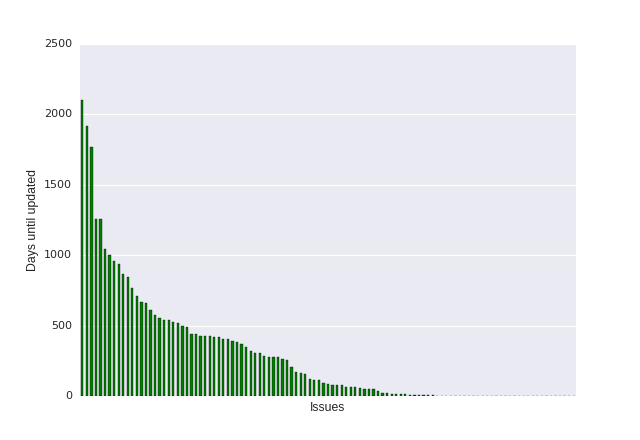

In [101]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Trivial'].dt.days.plot(kind='bar', color = 'green')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


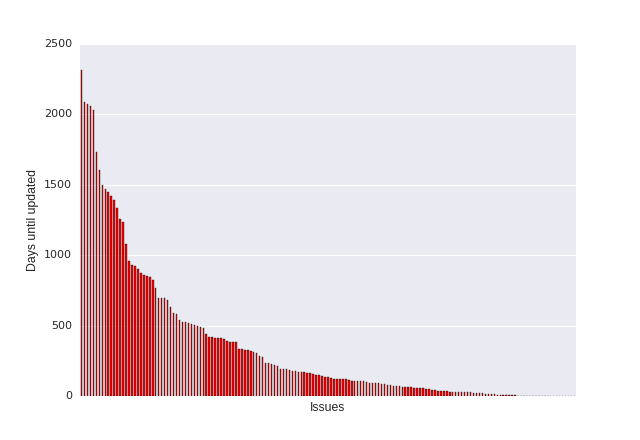

In [102]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Critical'].dt.days.plot(kind='bar', color = 'red')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


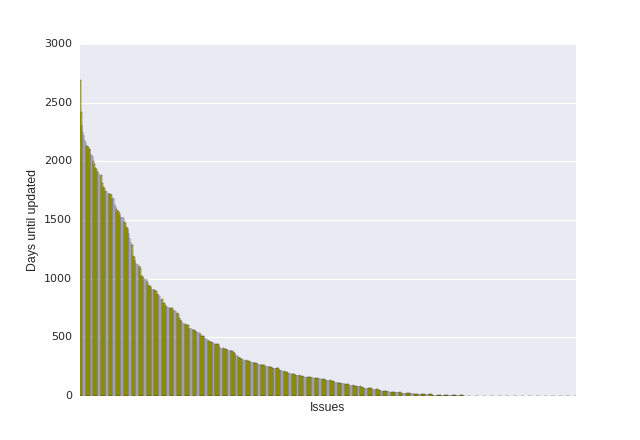

In [103]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Minor'].dt.days.plot(kind='bar', color = 'yellow')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

<IPython.core.display.Javascript object>


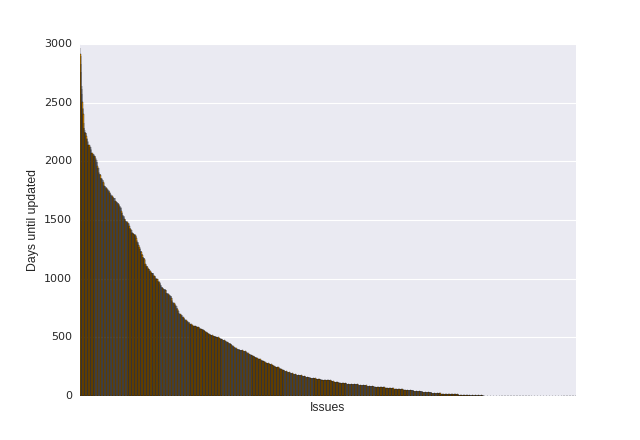

In [105]:
plt.close('all')
(issues.updated_at - issues.created_at).sort_values(ascending=False)[issues.priority=='Major'].dt.days.plot(kind='bar', color = 'orange')#, color=[cmap(x) for x in issues.priority] )
plt.xticks([])
plt.ylabel('Days until updated')
plt.xlabel('Issues')

## Distributions of Priorities

In [47]:
priority_frame = pd.DataFrame(columns = ['_id','priority','time'],data={'_id':issues._id, 'priority':issues.priority, 'time':issues.updated_at - issues.created_at})

In [48]:
priority_frame.fillna('nan',inplace=True)

<IPython.core.display.Javascript object>


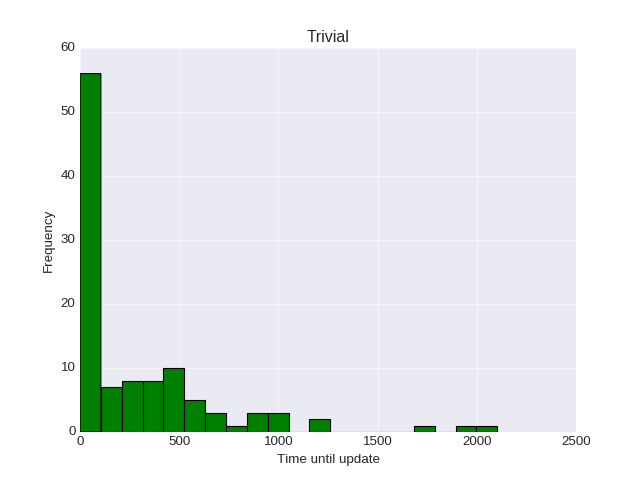

<IPython.core.display.Javascript object>


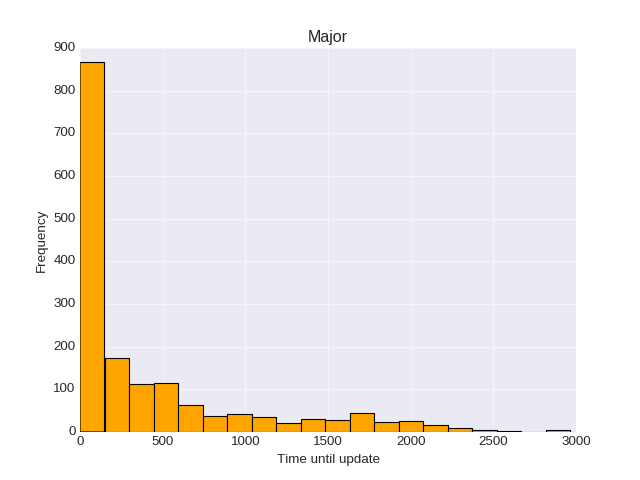

<IPython.core.display.Javascript object>


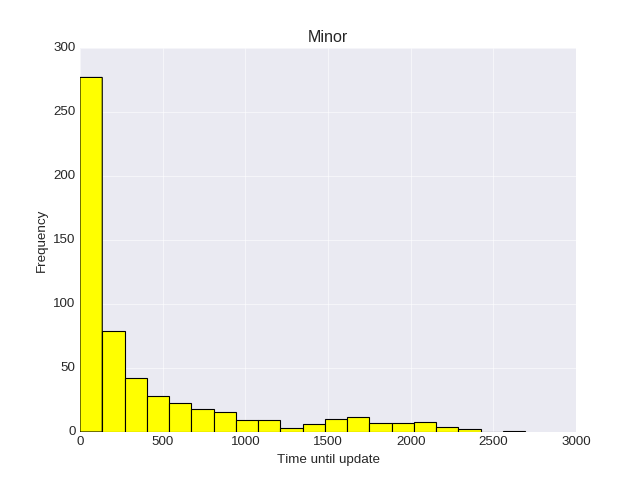

<IPython.core.display.Javascript object>


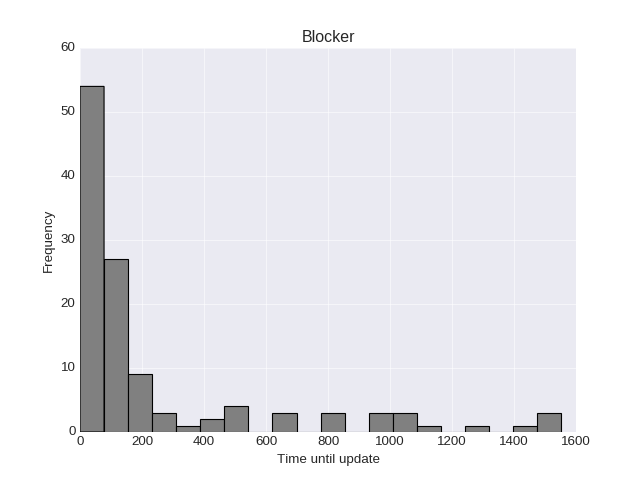

<IPython.core.display.Javascript object>


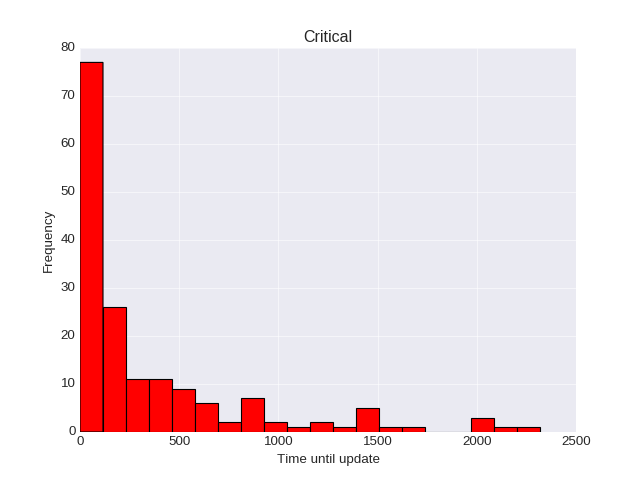

<IPython.core.display.Javascript object>


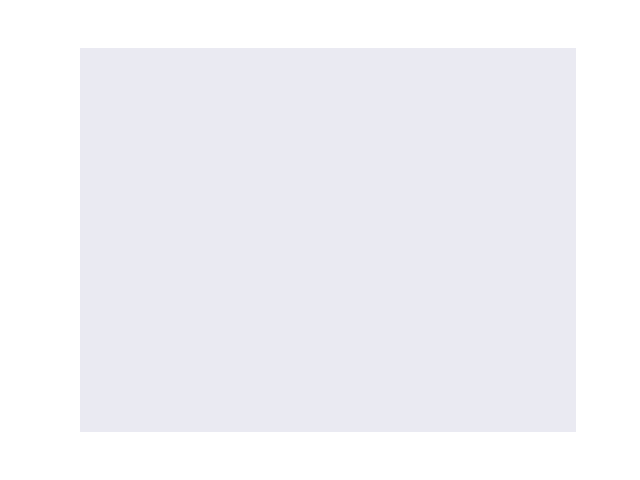

In [49]:
plt.close('all')
for p in priority_frame.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    priority_frame.time[priority_frame.priority==p].dt.days.hist(bins=20,ax=ax, color=cmap[p])
    ax.set_title(p)
    ax.set_xlabel('Time until update')
    ax.set_ylabel('Frequency')
    

## How many events given a priority?

In [61]:
event_prios = { p:events.loc[events.issue_id.isin(priority_frame._id[priority_frame.priority == p])] for p in priority_frame.priority.unique() }

<IPython.core.display.Javascript object>


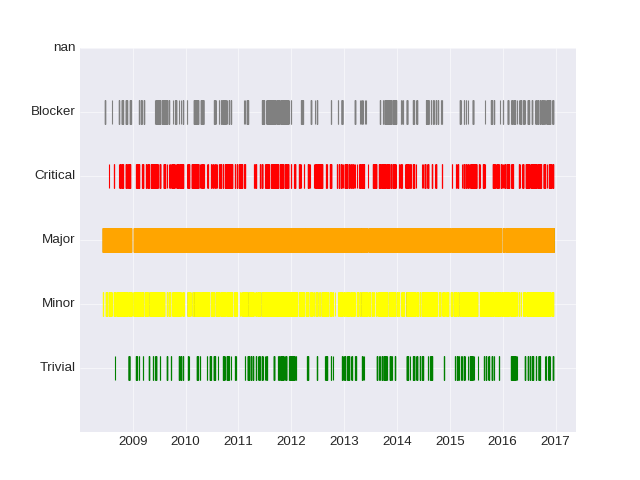

In [99]:
plt.close('all')
event_prios['Trivial']
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
fig = plt.figure()
ax = fig.add_subplot(111)
    
for i,p in enumerate(priority_frame.priority.unique()):

    x = np.array(event_prios[p].created_at)
    y = ymap[p]*np.ones(len(x))
    ax.scatter(x,y, marker='|', color=cmap[p], s=500)
    ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])
    

## Looking at Blocker Issues

**Intermediate Goal:** Find the frequency of events, as a function of distance from creation time

In [98]:
blockers = issues[issues.priority == 'Blocker']

In [130]:
blocker_events = pd.DataFrame(columns = blockers._id, data={
                                                            i:(events.created_at[events.issue_id == i] - blockers.created_at[blockers._id==i].iloc[0]) 
                                                            for i in blockers._id
                                                            })
#for i in blockers._id:
    

In [143]:
tmp = blocker_events[blocker_events.columns[0]].iloc[0]

In [159]:
tmp.days

46

<IPython.core.display.Javascript object>


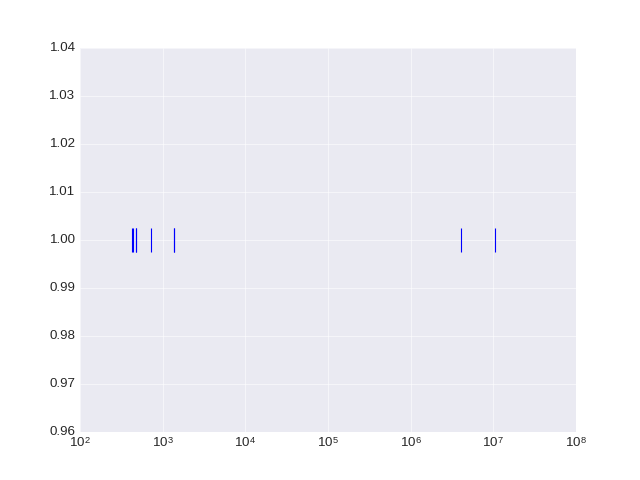

In [196]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
for i in blocker_events.columns[:1]:
    xd = np.array(blocker_events[i].dt.days)
    xs = np.array(blocker_events[i].dt.seconds)
    
    y = np.ones_like(x)
    ax.scatter(xs+xd*86400,y, marker='|', s=500)
ax.set_xscale('log')

In [169]:
seconds_passed = np.array([ np.array(blocker_events[i].dt.days.iloc[j])*86400 + np.array(blocker_events[i].dt.seconds.iloc[j])for j in range(len(blocker_events[i])) for i in blocker_events.columns[:]])

KeyboardInterrupt: 

In [177]:
seconds_passed = pd.concat([blocker_events[i].dropna() for i in blocker_events.columns], axis=0)

<IPython.core.display.Javascript object>


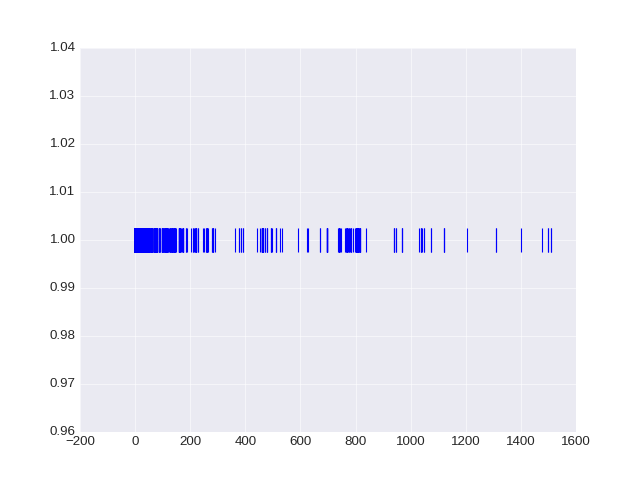

In [188]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(seconds_passed.dt.days, np.ones(len(seconds_passed)), marker='|', s=500)

<IPython.core.display.Javascript object>


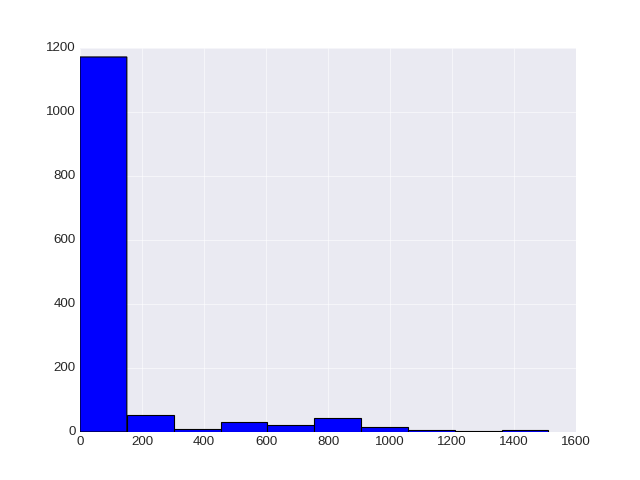

In [192]:
plt.close('all')
seconds_passed.dt.days.hist()

In [190]:
first_day = seconds_passed[seconds_passed.dt.days==1]

<IPython.core.display.Javascript object>


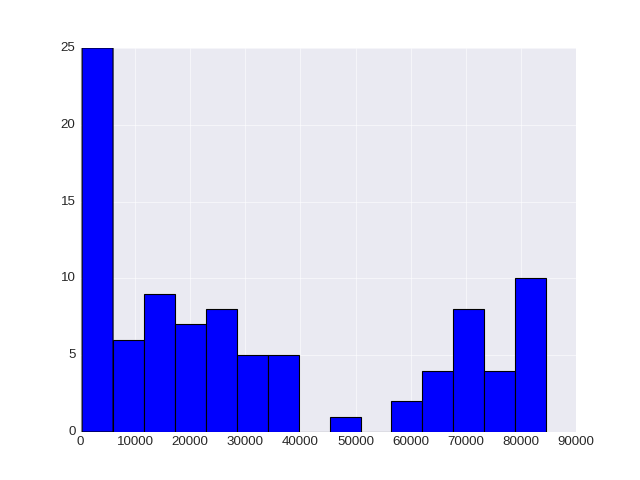

In [195]:
plt.close('all')
first_day.dt.seconds.hist(bins=15)

## Back to all Issues but now conditional


In [16]:
#pd.DataFrame(columns = blockers._id, data={
#                                                            i:(events.created_at[events.issue_id == i] - blockers.created_at[blockers._id==i].iloc[0]) 
#                                                            for i in blockers._id
#                                                            })
conditional_events = events


In [17]:
def get_distance_from_issue_creation(x):
    return x.created_at-issues.created_at[issues._id == x.issue_id].iloc[0]
def get_priority(x):
    return issues.priority[issues._id == x].iloc[0]

conditional_events['priority']=conditional_events.issue_id.apply(get_priority)

#conditional_events.distance_from_issue = conditional_events.apply(get_distance_from_issue_creation, axis=1)

In [18]:
conditional_events['distance_from_issue'] = conditional_events.apply(get_distance_from_issue_creation, axis=1)

<IPython.core.display.Javascript object>


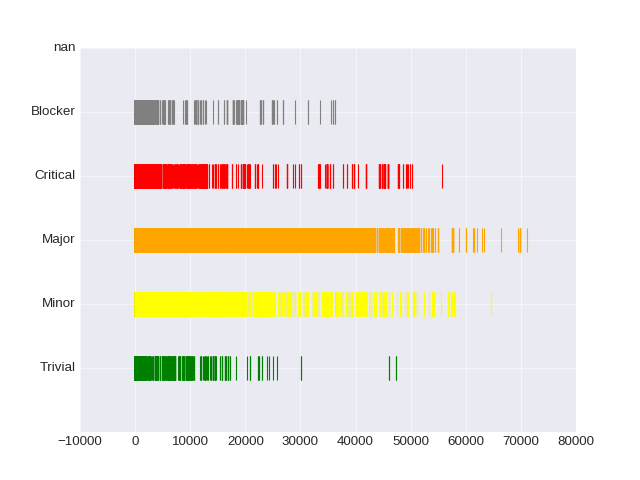

In [25]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
fig = plt.figure()
ax = fig.add_subplot(111)
    
for p in conditional_events.priority.unique():

    x = np.array(conditional_events.distance_from_issue[conditional_events.priority == p]/pd.Timedelta('1 hour'))
    y = ymap[p]*np.ones(len(x))
    ax.scatter(x,y, marker='|', color=cmap[p], s=500)
    ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])
    

<IPython.core.display.Javascript object>


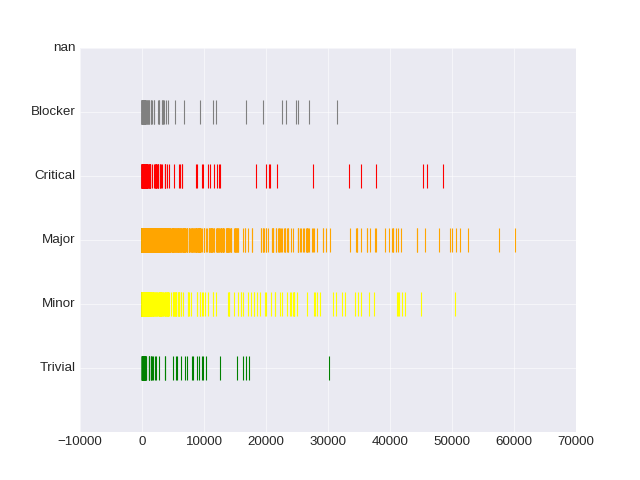

In [42]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
fig = plt.figure()
ax = fig.add_subplot(111)
    
for p in conditional_events.priority.unique():

    x = np.array(conditional_events.distance_from_issue[(conditional_events.priority == p)&(conditional_events.status=='status')&(conditional_events.new_value=='Resolved')]/pd.Timedelta('1 hour'))
    y = ymap[p]*np.ones(len(x))
    ax.scatter(x,y, marker='|', color=cmap[p], s=500)
    ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])

<IPython.core.display.Javascript object>


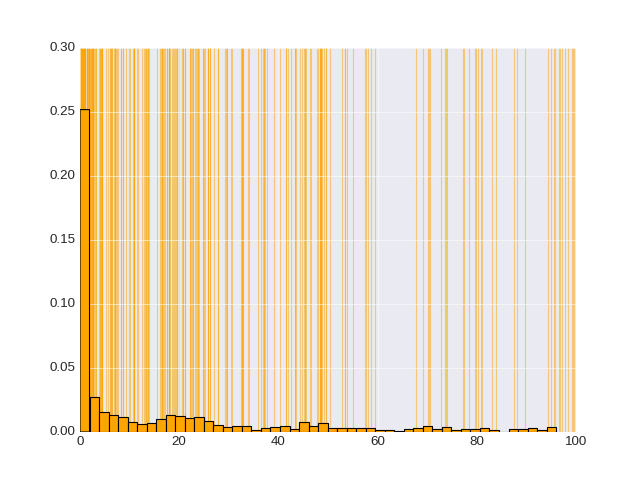

<IPython.core.display.Javascript object>


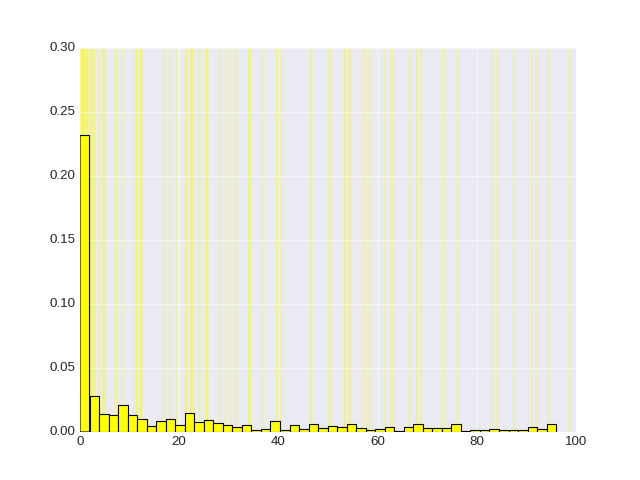

<IPython.core.display.Javascript object>


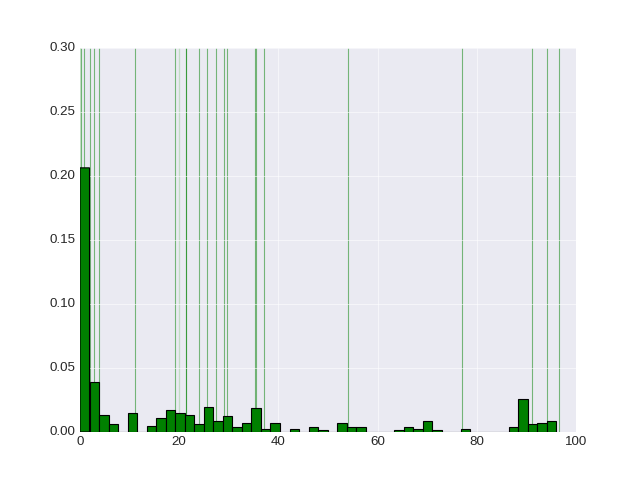

<IPython.core.display.Javascript object>


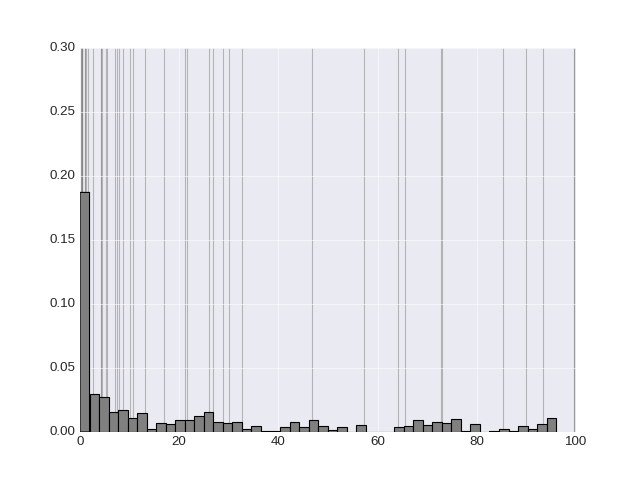

<IPython.core.display.Javascript object>


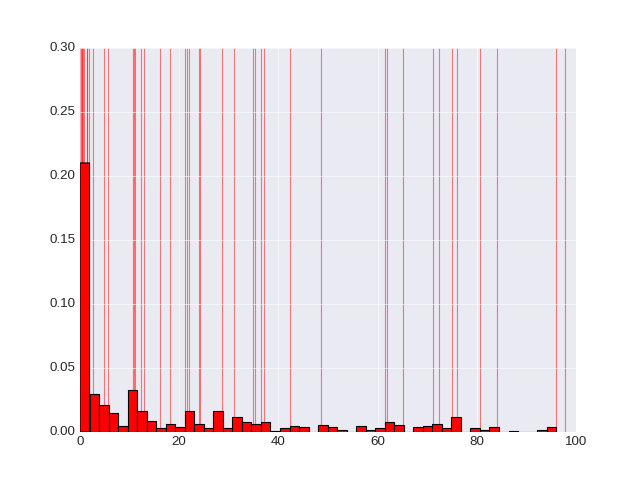

In [47]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}

for p in conditional_events.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.array(conditional_events.distance_from_issue[conditional_events.priority == p]/pd.Timedelta('1 hour'))
    x2 = np.array(conditional_events.distance_from_issue[(conditional_events.priority==p)&(conditional_events.new_value=='Resolved')]/pd.Timedelta('1 hour'))
    y = ymap[p]*np.ones(len(x))
    ax.vlines(x2, 0,0.3, color=cmap[p], alpha =0.5 , zorder=0)
    ax.hist(x, bins=50, normed=True,range=(0,96), color = cmap[p], zorder=1)
    ax.set_xlim(0,100)
    #ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])

<IPython.core.display.Javascript object>


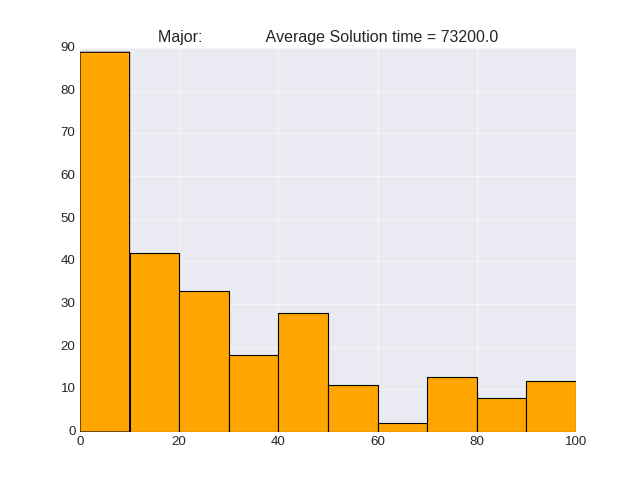

<IPython.core.display.Javascript object>


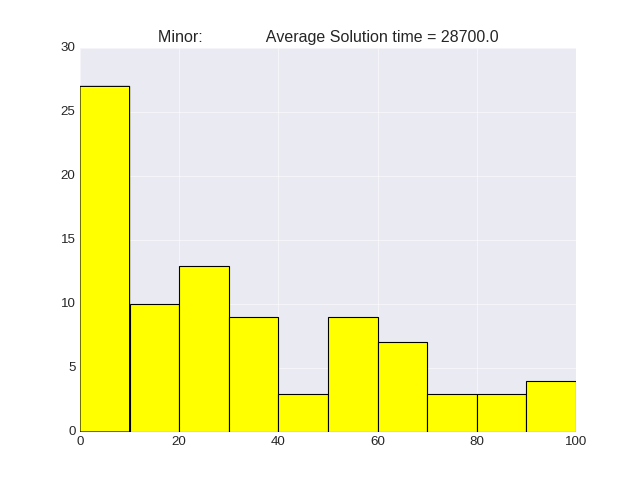

<IPython.core.display.Javascript object>


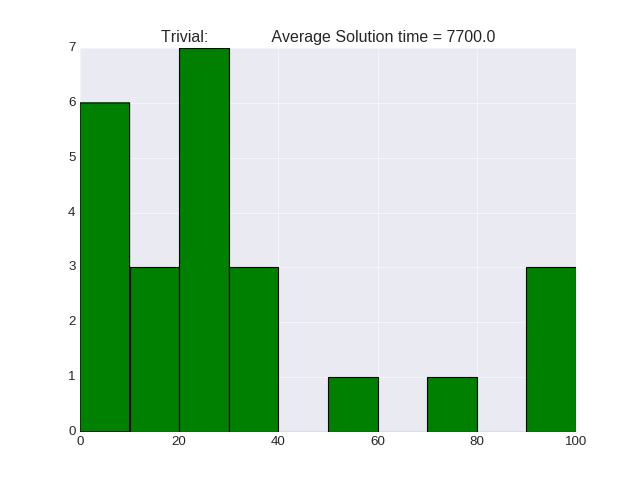

<IPython.core.display.Javascript object>


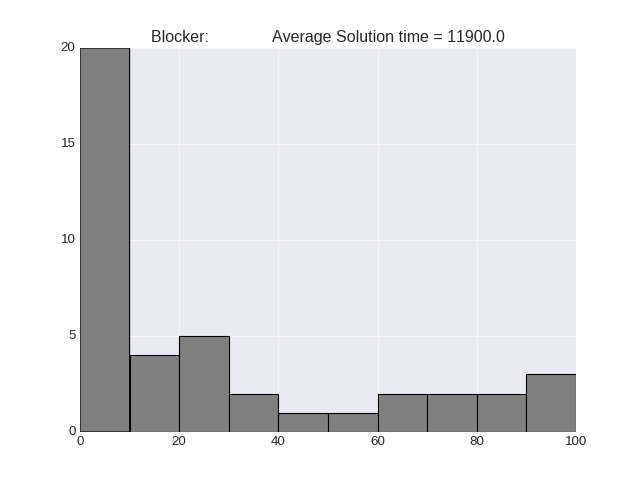

<IPython.core.display.Javascript object>


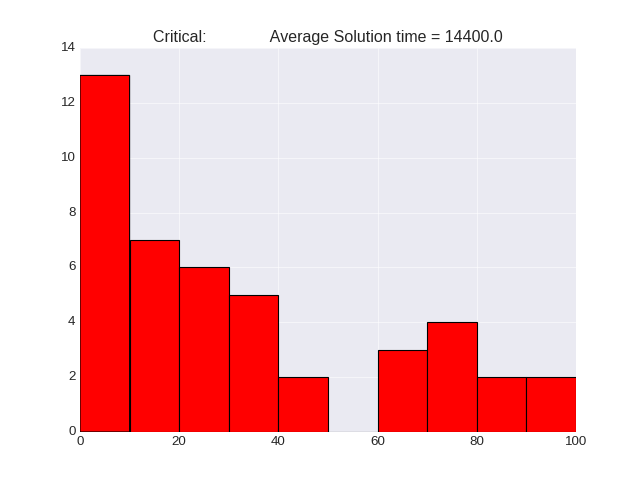

In [38]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
resolvement_dict = {}
soltimes = {}
for p in conditional_events.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #x = np.array(conditional_events.distance_from_issue[conditional_events.priority == p]/pd.Timedelta('1 hour'))
    x2 = np.array(conditional_events.distance_from_issue[(conditional_events.priority==p)&(conditional_events.new_value=='Resolved')]/pd.Timedelta('1 hour'))
    y = ymap[p]*np.ones(len(x2))
    #ax.vlines(x2, 0,0.3, color=cmap[p], alpha =0.5 , zorder=0)
    n,bins,patches = ax.hist(x2, bins=10, normed=False,range=(0,100), color = cmap[p], zorder=1)
    resolvement_dict.update({p:{'n':n,'bins':bins}})
    Expectationvalue = np.sum(n*(bins[1:]-bins[:-1])*(bins[1:]+bins[:-1])/2.)
    soltimes.update({p:Expectationvalue})
    ax.set_title('{}:              Average Solution time = {}'.format(p, Expectationvalue))
    #ax.set_yscale('log')
    #ax.set_xlim(0,100)
    #ax.set_yticklabels(['','Trivial', 'Minor','Major','Critical','Blocker','nan'])

In [39]:
for p in resolvement_dict.keys():
    for q in resolvement_dict.keys():
        print(p,
              q, 
              sp.stats.chisquare(
                                resolvement_dict[p]['n'], resolvement_dict[q]['n']
                                 ) 
                )

(u'Blocker', u'Blocker', Power_divergenceResult(statistic=0.0, pvalue=1.0))
(u'Blocker', u'Major', Power_divergenceResult(statistic=181.53944806753796, pvalue=2.4168043377930586e-34))
(u'Blocker', u'Critical', Power_divergenceResult(statistic=inf, pvalue=0.0))
(u'Blocker', u'Trivial', Power_divergenceResult(statistic=inf, pvalue=0.0))
(u'Blocker', u'Minor', Power_divergenceResult(statistic=28.714875864875864, pvalue=0.00072382014760327001))
(u'Major', u'Blocker', Power_divergenceResult(statistic=1818.3499999999999, pvalue=0.0))
(u'Major', u'Major', Power_divergenceResult(statistic=0.0, pvalue=1.0))
(u'Major', u'Critical', Power_divergenceResult(statistic=inf, pvalue=0.0))
(u'Major', u'Trivial', Power_divergenceResult(statistic=inf, pvalue=0.0))
(u'Major', u'Minor', Power_divergenceResult(statistic=554.55547415547414, pvalue=1.1745292161885305e-113))
(u'Critical', u'Blocker', Power_divergenceResult(statistic=14.233333333333334, pvalue=0.11426383340088846))
(u'Critical', u'Major', Power_

<IPython.core.display.Javascript object>


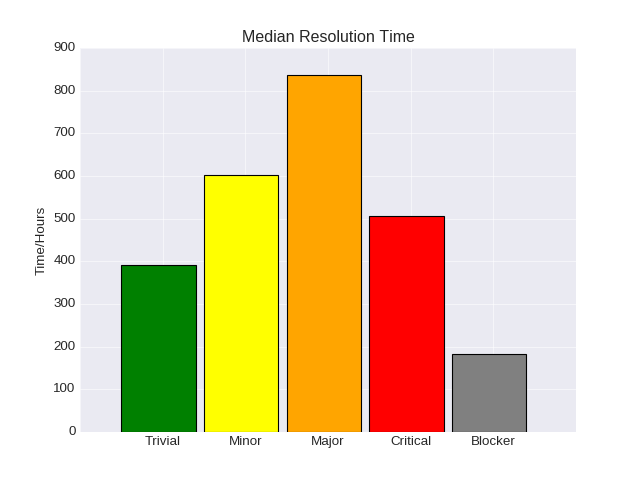

In [23]:
plt.close('all')
fig=plt.figure()
ax=fig.add_subplot(111)
for p in conditional_events.priority.unique():
    x2 = np.array(conditional_events.distance_from_issue[(conditional_events.priority==p)&(conditional_events.new_value=='Resolved')]/pd.Timedelta('1 hour'))

    mean = x2.mean()
    median = np.median(x2)
    std = x2.std()
    #ax.bar(ymap[p]-0.5, mean, 0.29, color = cmap[p])
    ax.bar(ymap[p]-0.5, median, 0.9, color = cmap[p],ls='-')
    #ax.bar(ymap[p]-0.5+0.6, std, 0.29, color = cmap[p])


    #ax.bar(ymap[p]-0.5,soltimes[p], 0.9, color=cmap[p])
ax.set_title('Median Resolution Time')
ax.set_ylabel('Time/Hours')
ax.set_xticklabels(['', 'Trivial', 'Minor','Major','Critical','Blocker', ''])

### Correlation

Doesn't really work the way I do it... 

In [118]:
def make_timeseries(x):
    dt = 0 
    ipointer = 0
    x2series = []
    while dt<x[-1]:
        if (dt-1<x[ipointer]) and (dt>x[ipointer]):
            x2series.append(1)
            ipointer+=1
        else:
            x2series.append(0)
        dt+=1
    return x2series

In [1]:
x2 = conditional_events.distance_from_issue[(conditional_events.priority=='Major')&(conditional_events.issue_id==conditional_events.issue_id.iloc[1])]/pd.Timedelta('1 minute')


NameError: name 'conditional_events' is not defined

In [88]:
x2.sort_values(inplace=True)

In [102]:
x2= np.array(x2)

In [106]:
x2

array([  1.53615000e+00,   7.28567722e+03,   8.39231335e+03,
         8.39231335e+03,   9.48325455e+04,   1.87151799e+05,
         2.03228318e+05])

In [104]:
x2_intervals = x2[1:]-x2[:-1]

In [110]:
x2_intervals = np.insert(x2_intervals, 0,x2[0])

In [114]:

xcorr = sp.correlate(x2series,x2series, mode='same')

In [116]:
xcorr.argmax()

101614

## Authors working on priorities

In [59]:
authors = pd.DataFrame(list(db.people.find()))

In [60]:
authors._id = authors._id.astype('string')

In [61]:
authors.username.head()

0    zookeeper-user
1    zookeeper-user
2        yeqian.zju
3     zookeeper-dev
4    zookeeper-user
Name: username, dtype: object

In [41]:
conditional_events.author_id = conditional_events.author_id.astype('string')

In [43]:
priority_events = conditional_events.groupby(by='priority')

<IPython.core.display.Javascript object>


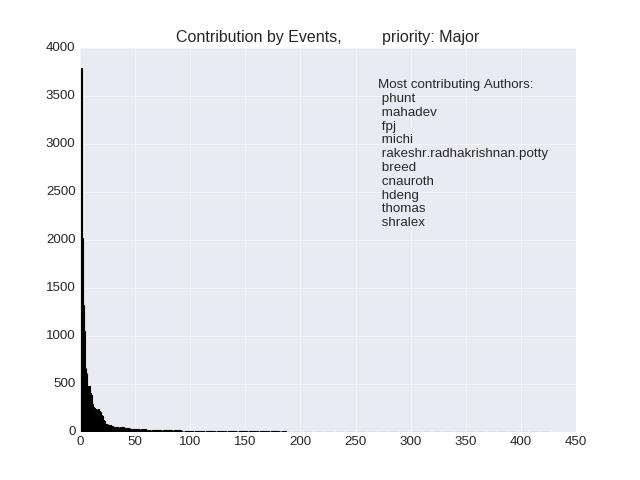

<IPython.core.display.Javascript object>


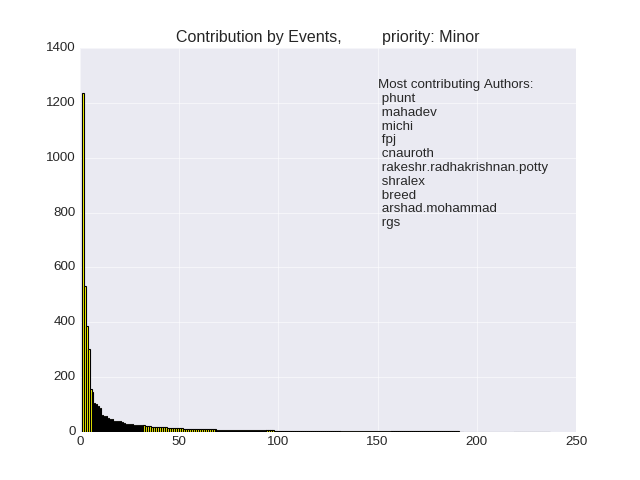

<IPython.core.display.Javascript object>


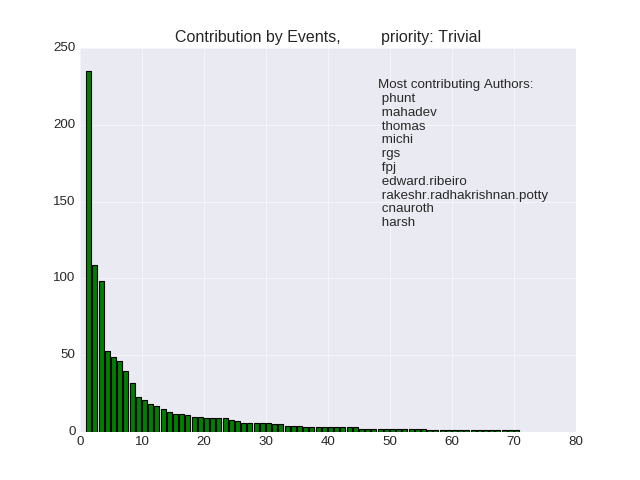

<IPython.core.display.Javascript object>


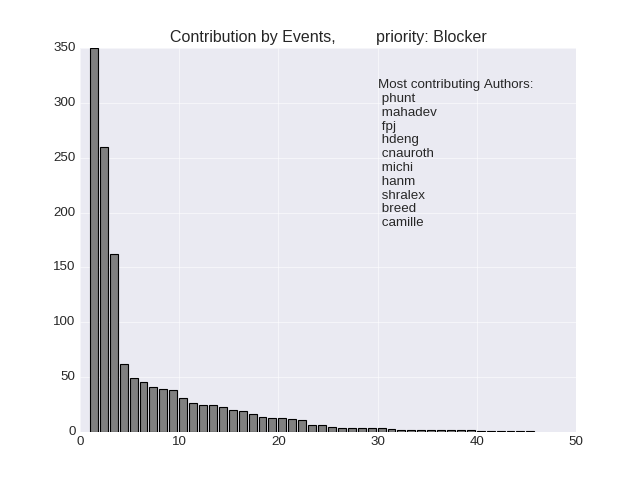

<IPython.core.display.Javascript object>


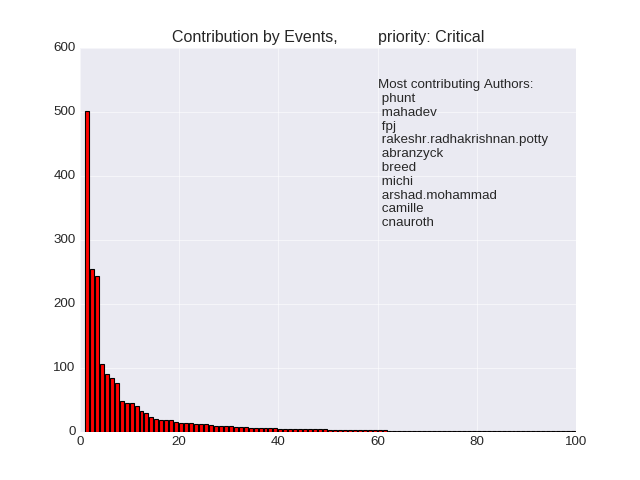

In [88]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
for p in conditional_events.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Contribution by Events,         priority: {}'.format(p))
    counts = (conditional_events[conditional_events.priority==p].groupby(by='author_id').count()['created_at']).sort_values(ascending=False)
    x = np.arange(1,len(counts.index.unique())+1 )
    for i,author in enumerate(counts.index.unique()):
        ax.bar(x[i], counts.loc[author], color=cmap[p])
    ax.text(0.6*ax.get_xlim()[1], 0.5*ax.get_ylim()[1], '''Most contributing Authors: \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n  '''.format(
            authors[authors._id == counts.index[0]].username.iloc[0],
            authors[authors._id == counts.index[1]].username.iloc[0],
            authors[authors._id == counts.index[2]].username.iloc[0],
            authors[authors._id == counts.index[3]].username.iloc[0],
            authors[authors._id == counts.index[4]].username.iloc[0],
            authors[authors._id == counts.index[5]].username.iloc[0],
            authors[authors._id == counts.index[6]].username.iloc[0],
            authors[authors._id == counts.index[7]].username.iloc[0],
            authors[authors._id == counts.index[8]].username.iloc[0],
            authors[authors._id == counts.index[9]].username.iloc[0]
                               )
           )
    plt.savefig('ContribEvent{}.png'.format(p))

## Commenting based on priority

In [81]:
comments = pd.DataFrame(list(db['issue_comment'].find()))

In [82]:
comments.author_id = comments.author_id.astype('string')
comments.issue_id = comments.issue_id.astype('string')

In [83]:
comments['priority']=comments.issue_id.apply(get_priority)

In [84]:
comments.head()

,_id,author_id,comment,created_at,external_id,issue_id,priority
0,585403cf78e57ebf974e7266,5853eb403ee1b95d79882840,SVN dump of ZooKeeper version 175.\r\n\r\nCrea...,2008-06-06 22:03:50.208,12603194,585403ce78e57ebf974e725e,Major
1,585403dc78e57ebf974e72d6,5853eb403ee1b95d79882840,Andrew could you take a look at this one?,2008-06-10 20:44:04.233,12604031,585403da78e57ebf974e72cc,Major
2,5854040078e57ebf974e7389,5853eb403ee1b95d79882840,Patch submitted on SF at:\r\nhttp://sourceforg...,2008-06-10 22:52:55.064,12604070,5854040078e57ebf974e7385,Major
3,5854041578e57ebf974e7411,5853eb403ee1b95d79882840,patch on souceforge at:\r\nhttp://sourceforge....,2008-06-10 22:54:38.637,12604072,5854041478e57ebf974e740c,Major
4,5854041578e57ebf974e7412,5853eb403ee1b95d79882840,Updated patch on sourceforge has Andrew assign...,2008-06-10 22:56:05.764,12604073,5854041478e57ebf974e740c,Major


<IPython.core.display.Javascript object>


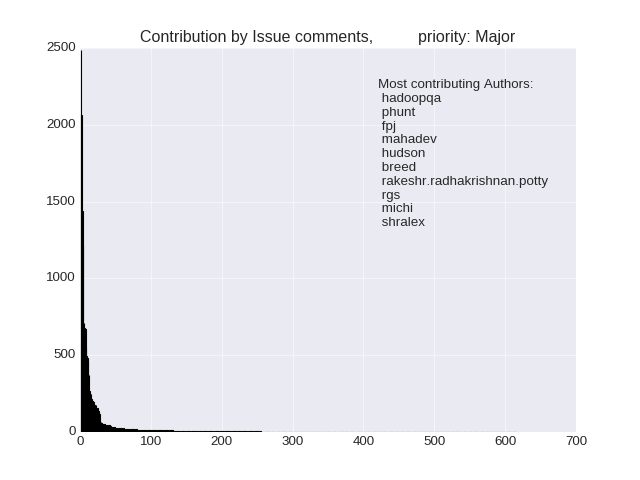

<IPython.core.display.Javascript object>


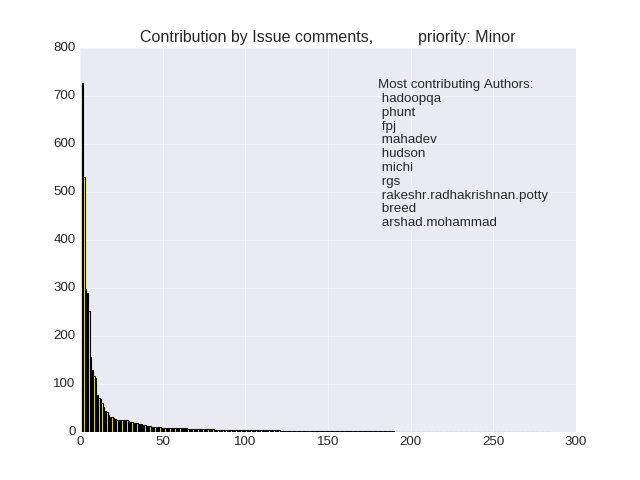

<IPython.core.display.Javascript object>


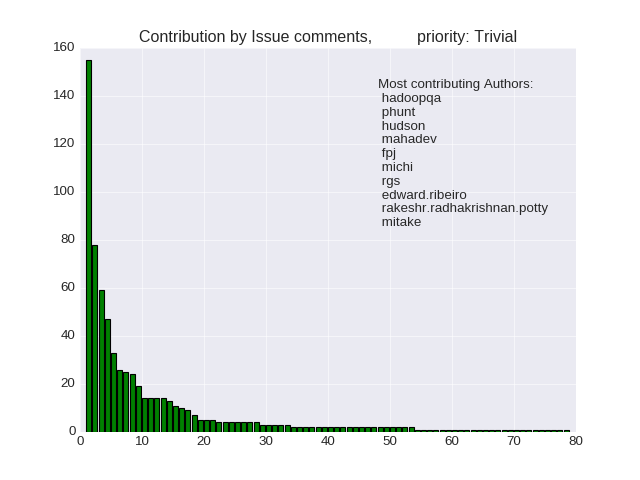

<IPython.core.display.Javascript object>


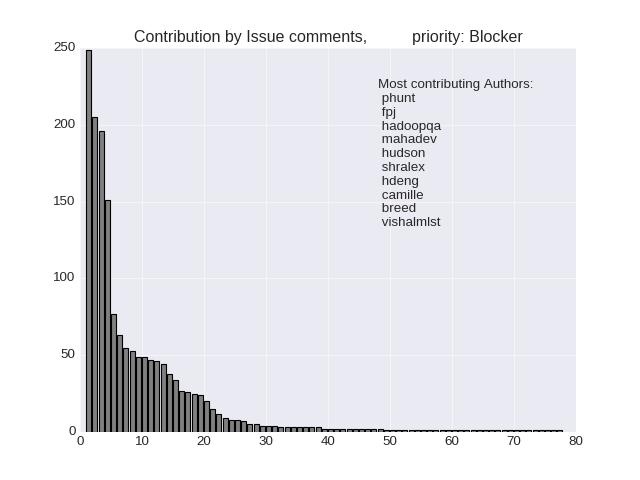

<IPython.core.display.Javascript object>


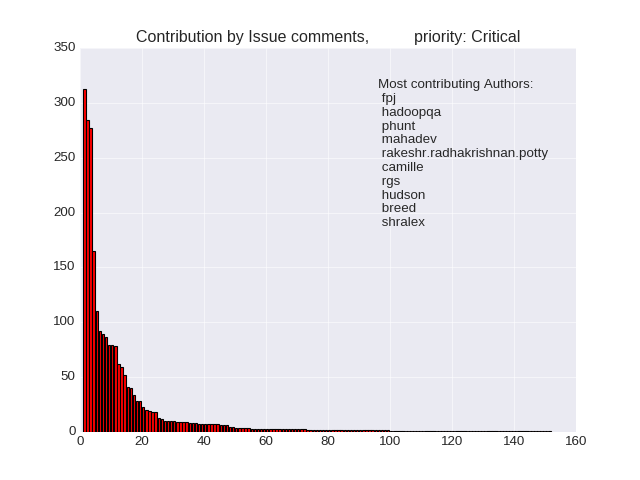

In [89]:
plt.close('all')
ymap = {'Trivial':1, 'Minor':2, 'Major':3, 'Critical':4, 'Blocker':5, 'nan':7}
for p in comments.priority.unique():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Contribution by Issue comments,          priority: {}'.format(p))
    counts = (comments[comments.priority==p].groupby(by='author_id').count()['created_at']).sort_values(ascending=False)
    x = np.arange(1,len(counts.index.unique())+1 )
    for i,author in enumerate(counts.index.unique()):
        ax.bar(x[i], counts.loc[author], color=cmap[p])
    ax.text(0.6*ax.get_xlim()[1], 0.5*ax.get_ylim()[1], '''Most contributing Authors: \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n {} \n  '''.format(
            authors[authors._id == counts.index[0]].username.iloc[0],
            authors[authors._id == counts.index[1]].username.iloc[0],
            authors[authors._id == counts.index[2]].username.iloc[0],
            authors[authors._id == counts.index[3]].username.iloc[0],
            authors[authors._id == counts.index[4]].username.iloc[0],
            authors[authors._id == counts.index[5]].username.iloc[0],
            authors[authors._id == counts.index[6]].username.iloc[0],
            authors[authors._id == counts.index[7]].username.iloc[0],
            authors[authors._id == counts.index[8]].username.iloc[0],
            authors[authors._id == counts.index[9]].username.iloc[0]
                               )
           )
    plt.savefig('ContribComm{}.png'.format(p))